<a href="https://colab.research.google.com/github/tawhidliyon/Machine-Learning/blob/main/hand_written.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow keras matplotlib


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [3]:
import tensorflow_datasets as tfds

# Load EMNIST dataset
ds_train, ds_test = tfds.load('emnist/balanced', split=['train', 'test'], as_supervised=True)

def preprocess(image, label):
    # Normalize images to [0, 1]
    image = tf.image.convert_image_dtype(image, tf.float32)
    # Resize image to 28x28 (already 28x28, but ensure compatibility)
    image = tf.image.resize(image, (28, 28))
    return image, label

train_data = ds_train.map(preprocess).batch(128).shuffle(10000)
test_data = ds_test.map(preprocess).batch(128)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/balanced/incomplete.AFYAQG_3.1.0/emnist-train.tfrecord*...:   0%|  …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/emnist/balanced/incomplete.AFYAQG_3.1.0/emnist-test.tfrecord*...:   0%|   …

Dataset emnist downloaded and prepared to /root/tensorflow_datasets/emnist/balanced/3.1.0. Subsequent calls will reuse this data.


In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(47, activation='softmax')  # 47 classes in EMNIST Balanced set
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_data, epochs=50, validation_data=test_data)


Epoch 1/50
882/882 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9101 - loss: 0.2277 - val_accuracy: 0.8741 - val_loss: 0.3601
Epoch 2/50
882/882 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9143 - loss: 0.2137 - val_accuracy: 0.8745 - val_loss: 0.3665
Epoch 3/50
882/882 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9184 - loss: 0.2051 - val_accuracy: 0.8795 - val_loss: 0.3746
Epoch 4/50
882/882 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9232 - loss: 0.1899 - val_accuracy: 0.8784 - val_loss: 0.3799
Epoch 5/50
882/882 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9258 - loss: 0.1814 - val_accuracy: 0.8773 - val_loss: 0.3976
Epoch 6/50
882/882 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9283 - loss: 0.1714 - val_accuracy: 0.8769 - val_loss: 0.4066
Epoch 7/50
882/882 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9292 - loss: 0.1668 - val_accuracy: 0.8760 - val_loss: 0.4244
Epoch 8/50
882/882 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9341 - loss: 0.1568 - val_accuracy: 

In [7]:
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc:.2f}")


147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8626 - loss: 1.1584
Test Accuracy: 0.86


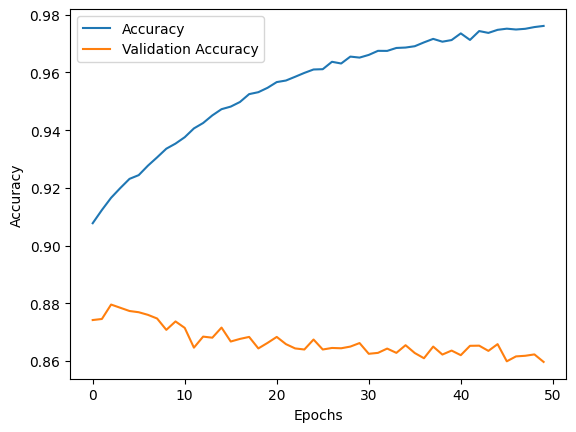

In [8]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Saving Screenshot 2025-03-27 055103.png to Screenshot 2025-03-27 055103 (1).png


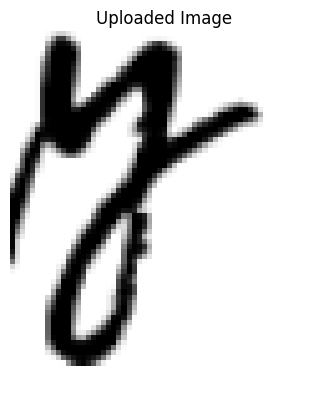

In [21]:
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt

# Upload the image
uploaded = files.upload()

# Open the image
for filename in uploaded.keys():
    image = Image.open(filename).convert('L')  # Convert to grayscale
    plt.imshow(image, cmap='gray')
    plt.title("Uploaded Image")
    plt.axis('off')
    plt.show()


In [22]:
# Resize the image
image = image.resize((28, 28))

# Convert the image to numpy array and normalize
image_array = np.array(image) / 255.0  # Normalize to [0, 1]
image_array = np.expand_dims(image_array, axis=-1)  # Add channel dimension
image_array = np.expand_dims(image_array, axis=0)   # Add batch dimension


In [23]:
# Predict the character
predictions = model.predict(image_array)
predicted_label = np.argmax(predictions)

# Display the result
print(f"Predicted Character Label: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Character Label: 8


In [24]:
# Label to Character Mapping for EMNIST Balanced Dataset
label_to_char = {
    0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9',  # Digits
    10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I',
    19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R',
    28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z',          # Uppercase
    36: 'a', 37: 'b', 38: 'd', 39: 'e', 40: 'f', 41: 'g', 42: 'h', 43: 'n',
    44: 'q', 45: 'r', 46: 't'                                                       # Lowercase (Subset)
}

# Example usage
predicted_label = 13  # This is just an example label
predicted_character = label_to_char.get(predicted_label, "Unknown")
print(f"Predicted Character: {predicted_character}")


Predicted Character: D
